<a href="https://colab.research.google.com/github/AnastasiaKazanas/ANN-Final-Project/blob/main/Bert_LR/FakeNewsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import random
import torch
import random
import torch
import numpy as np
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
from sklearn.metrics.pairwise import cosine_similarity
import kagglehub
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [7]:
nltk.download('stopwords')
nltk.download('wordnet')

path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")

# Load the dataset
df = pd.read_csv("/root/.cache/kagglehub/datasets/saurabhshahane/fake-news-classification/versions/77/WELFake_Dataset.csv")

print("Dataset preview:")
print(df.head())

print("\nDataset statistics:")
print(df.describe())

missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)

# Check for missing values and drop them
df.dropna(subset=['text', 'label'], inplace=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset preview:
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  

Dataset statistics:
         Unnamed: 0         label
count  72134.000000  72134.000000
mean   36066.500000      0.514404
std    20823.436496      0.499796
min        0.000000      0.000000
25%    1803

In [8]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

df['processed_text'] = df['text'].apply(preprocess_text)

# # Split the dataset
# train_texts, test_texts, train_labels, test_labels = train_test_split(
#     df['text'], df['label'], test_size=0.2, random_state=42
# )

ANN-Final-Project  sample_data


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Model Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

       False       0.70      0.64      0.67      6871
        True       0.60      0.66      0.63      5618

    accuracy                           0.65     12489
   macro avg       0.65      0.65      0.65     12489
weighted avg       0.66      0.65      0.65     12489



Text(0.5, 1.0, 'Confusion Matrix')

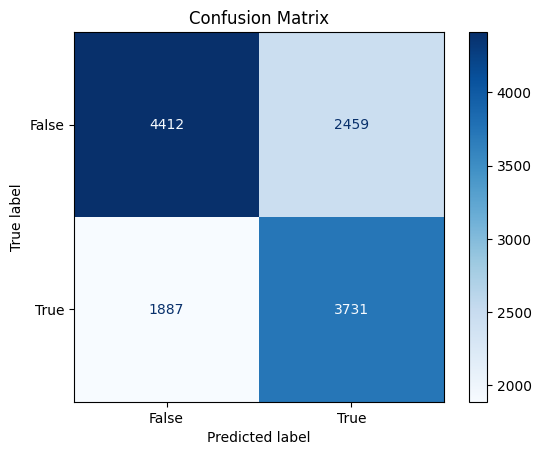

In [11]:
!pip install h5py
!ls

import h5py

# Load the file from the current directory
file_path = '/content/ANN-Final-Project/Bert_embeding_datasets/Fake_News_Classification.h5'

# Open the HDF5 file in read mode ('r')
with h5py.File(file_path, 'r') as f:
    input_ids = np.array(f['input_ids'])
    labels = np.array(f['labels'])

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(input_ids, labels, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression
log_reg = LogisticRegression(max_iter=200, solver='saga', penalty='l2', C=1.0)
log_reg.fit(X_train, y_train)

# Step 4: Evaluate the Model
predictions = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"\nModel Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=['False', 'True']))

# Step 5: Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['False', 'True'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')